In [19]:
# Import Packages
import pandas as pd
import numpy as np
# Regex
import re
from bs4 import BeautifulSoup
import ssl
import requests
import urllib.request, urllib.parse, urllib.error

In [20]:
# Reading the website in
html = 'https://www.gutenberg.org/browse/scores/top'
response = requests.get(html)
html_content = response.content
# html_content

In [21]:
# 5. 
# info = response.content.decode(response.encoding)
soup = BeautifulSoup(html_content,'html.parser')
links = soup.find_all('a')
for_links = []

for links in links:
    href = links.get('href')
    if href:
        for_links.append(href)
for_links[:30]

['/',
 '/about/',
 '/about/',
 '/policy/collection_development.html',
 '/about/contact_information.html',
 '/about/background/',
 '/policy/permission.html',
 '/policy/privacy_policy.html',
 '/policy/terms_of_use.html',
 '/ebooks/',
 '/ebooks/',
 '/ebooks/bookshelf/',
 '/browse/scores/top',
 '/ebooks/offline_catalogs.html',
 '/help/',
 '/help/',
 '/help/copyright.html',
 '/help/errata.html',
 '/help/file_formats.html',
 '/help/faq.html',
 '/policy/',
 '/help/public_domain_ebook_submission.html',
 '/help/submitting_your_own_work.html',
 '/help/mobile.html',
 '/attic/',
 '/donate/',
 '/donate/',
 'pretty-pictures',
 '#books-last1',
 '#authors-last1']

In [22]:
booknum = []

In [23]:
for i in range(19,119):
    link=for_links[i]
    link=link.strip()
#     Regex to get numeric digits
    n=re.findall('[0-9]+', link)
    if len(n)==1:
        booknum.append(int(n[0]))

In [24]:
# Check File numbers
print("\nThe file numbers for the top 100 ebooks",\
     "on Gutenberg are shown below \n"+"-"*70)
# booknum = booknum[:100]
print(booknum)


The file numbers for the top 100 ebooks on Gutenberg are shown below 
----------------------------------------------------------------------
[1, 1, 7, 7, 30, 30, 84, 26184, 2701, 1513, 11, 1342, 2542, 64317, 100, 2641, 145, 174, 37106, 844, 1080, 1952, 25344, 43, 67979, 16389, 345, 408, 394, 5197, 6761, 2160, 6593, 5200, 76, 4085, 1259, 1260, 2554, 1400, 37539, 3207, 98, 1232, 50150, 219, 2000, 1661, 205, 1727, 75333, 75334, 23, 1184, 41445, 15399, 28054, 75331, 768, 25558, 2650, 6130, 7370, 2591, 36, 2600, 16328, 1998, 1497, 2814, 5740, 75327, 4300, 16119, 55, 46, 132, 2097, 74, 4363, 45502, 3296, 45, 11030, 27761, 19942, 42324, 34901, 135, 8800, 2148]


In [25]:
# print(soup.text[:2000])
_1st_titles = []

In [26]:
start_index = soup.text.splitlines().index("Top 100 EBooks yesterday")
# For loop to get ebooks from 1-100
for i in range(100):
    _1st_titles.append(soup.text.splitlines()[start_index+2+i])

In [27]:
# Use regex tp get the text only from the name strings 
# and then put them into a list
titles_1st = []
for i in range(100):
    id1,id2=re.match('^[a-zA-Z ]*', _1st_titles[i]).span()
    titles_1st.append(_1st_titles[i][id1:id2])

In [28]:
# print list of titles
for l in titles_1st:
    print(l)

Frankenstein
Simple Sabotage Field Manual by United States
Moby Dick
Romeo and Juliet by William Shakespeare 
Alice
Pride and Prejudice by Jane Austen 
A Doll
The Great Gatsby by F
The Complete Works of William Shakespeare by William Shakespeare 
A Room with a View by E
Middlemarch by George Eliot 
The Picture of Dorian Gray by Oscar Wilde 
Little Women
The Importance of Being Earnest
A Modest Proposal by Jonathan Swift 
The Yellow Wallpaper by Charlotte Perkins Gilman 
The Scarlet Letter by Nathaniel Hawthorne 
The Strange Case of Dr
The Blue Castle
The Enchanted April by Elizabeth Von Arnim 
Dracula by Bram Stoker 
The Souls of Black Folk by W
Cranford by Elizabeth Cleghorn Gaskell 
My Life 
The Adventures of Ferdinand Count Fathom 
The Expedition of Humphry Clinker by T
History of Tom Jones
Metamorphosis by Franz Kafka 
Adventures of Huckleberry Finn by Mark Twain 
The Adventures of Roderick Random by T
Twenty years after by Alexandre Dumas and Auguste Maquet 
Jane Eyre
Crime and Pu

In [29]:
#  Activity 7.02

In [30]:
import json
import os

api_key = os.environ.get('API_Key')
params = {"f01281d" : api_key}

In [31]:
# Open the APIkeys 
with open('APIkeys.json') as f:
    keys = json.load(f)

omdbapi = keys['OMDBapi']

In [32]:
# Defining the URL and adding the API
serviceurl = "http://www.omdbapi.com/?"
apikey = '&apikey='+omdbapi
# print(apikey)

In [33]:
def print_json(json_data):
    list_keys = ['Title', 'Year', 'Rated', 'Released',
                 'Runtime', 'Genre', 'Director', 'Writer', 
                 'Actors', 'Plot', 'Language', 'Country', 
                 'Awards', 'Ratings','Metascore', 'imdbRating', 
                 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [34]:
# def save_poster(json_data):
#     import os
#     title = json_data['Title']
#     poster_url = json_data['Poster']
#     poster_file_extension=poster_url.split('.')[-1]
#     # Reads the image file from web
#     poster_data = urllib.request.urlopen(poster_url).read()
    
#     savelocation=os.getcwd()+'\\'+'Posters'+'\\'
#     """Creates new directory if the directory does not exist.Otherwise, just use the existing path."""
#     if not os.path.isdir(savelocation):
#         os.mkdir(savelocation)
#         filename=savelocation+str(title)
#         +'.'+poster_file_extension
#     f=open(filename,'wb')
#     f.write(poster_data)
#     f.close()

In [35]:
def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t':str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        if json_data['Response']=='True':
            print_json(json_data)
#             if json_data['Poster'] != 'N/A':
#                 save_poster(json_data)
#             else:
#                 print("Error")
    except urllib.error.URLError as e:
        print(f"Error: {e.reason}")
            

In [36]:
# Test the search_movie
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=f01281d
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,322,762
imdbID: tt0120338
--------------------------------------------------


# 3: Connect to an API and do a simple data pull

## This API pull comes from the Nasa website it will give a description and link to the Astronomy Picture of the Day. 

In [37]:
import requests
nasa_api ="9MBOcqkfCDFv1xjgkRvy2xNf3B7flcEatLE8kNc2"
nasa_url = f"https://api.nasa.gov/planetary/apod?api_key={nasa_api}"

In [38]:
response = requests.get(nasa_url)
data = response.json()
# print(data)
print(f"Title: {data['title']}")
print(f"Explanation: {data['explanation']}")
print(f"Image URL: {data['url']}")

Title: The Spider and the Fly
Explanation: Will the spider ever catch the fly? Not if both are large emission nebulas toward the constellation of the Charioteer (Auriga).  The spider-shaped gas cloud in the image center is actually an emission nebula labelled IC 417, while the smaller fly-shaped cloud on the left is dubbed  NGC 1931 and is both an emission nebula and a reflection nebula.  About 10,000 light-years distant, both nebulas harbor young star clusters. For scale, the more compact NGC 1931 (Fly) is about 10 light-years across. The featured deep image, captured over 20 hours during late January in Berkshire UK, also shows more diffuse and red-glowing interstellar gas and dust.   Explore Your Universe: Random APOD Generator
Image URL: https://apod.nasa.gov/apod/image/2502/SpiderFly_Boddington_1080.jpg


# 4: Creating Visualizations

## # This data describes all of the attributes of wine as well as a quality rating. I will be using this dataset to create my plots. 


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
xlsheet = "C:/Users/14027/Documents/Graduate_Schoolish/DS 500/WineQT.csv"
df1 = pd.read_csv(xlsheet)
# replace spaces with _
df1.columns = df1.columns.str.replace(' ', '_')
df1

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


# Line Plot: pH Balance 

Text(0, 0.5, 'pH Balance')

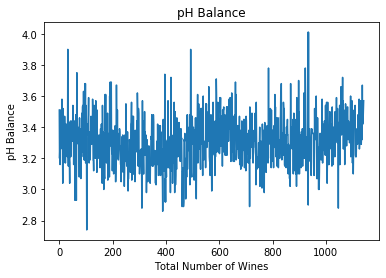

In [40]:
plt.plot(df1['pH'])
plt.title("pH Balance")
plt.xlabel("Total Number of Wines")
plt.ylabel("pH Balance")

# Bar Plot: quality vs residual sugar

Text(0, 0.5, 'Residual Sugar')

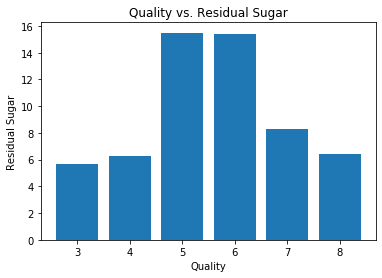

In [41]:
plt.bar(df1['quality'],df1['residual_sugar'])
plt.title("Quality vs. Residual Sugar")
plt.xlabel("Quality")
plt.ylabel("Residual Sugar")

# Histogram: Alcohol Content

Text(0, 0.5, 'Total Number of Wines')

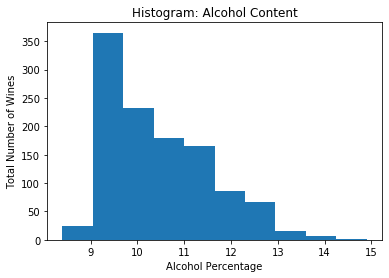

In [42]:
plt.hist(df1['alcohol'], bins=10)
plt.title("Histogram: Alcohol Content")
plt.xlabel("Alcohol Percentage")
plt.ylabel("Total Number of Wines")